In [181]:
import numpy as np
from lattice_class import *
from hamiltonian_constructor_class import *
import scipy.linalg
import matplotlib.pyplot as plt

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

plt.rcParams["figure.dpi"] = 150
plt.rcParams["savefig.dpi"] = 150

In [182]:
def lowest_abs_energy(N, t=1.0, mu=2.0, delta=complex(1.0, 0.0), phase_vortex=1):
    lattice = SquareLattice(N, "open")
    num_sites = lattice.get_num_sites()

    Ham_constructor = HamiltonianConstructor(mu, t, t, delta)
    H_direct_lattice = Ham_constructor.construct_direct_lattice_hamiltonian(lattice)
    flagged_bonds = [(idx, idx - 1) for idx in range(N // 2, N**2 // 2, N)]

    for bond in flagged_bonds:
        Ham_constructor.add_phase(H_direct_lattice, bond, phase_vortex, num_sites)
    energies, _ = scipy.linalg.eigh(H_direct_lattice)

    return np.min(np.abs(energies))

In [183]:
N_min = 5
N_max = 25
N_step = 2
N_range = [N for N in range(N_min, N_max + 1, N_step)]
num_sites = [N**2 for N in N_range]
energies_vortex = [lowest_abs_energy(N, phase_vortex=-1) for N in N_range]
energies_no_vortex = [lowest_abs_energy(N, phase_vortex=1) for N in N_range]

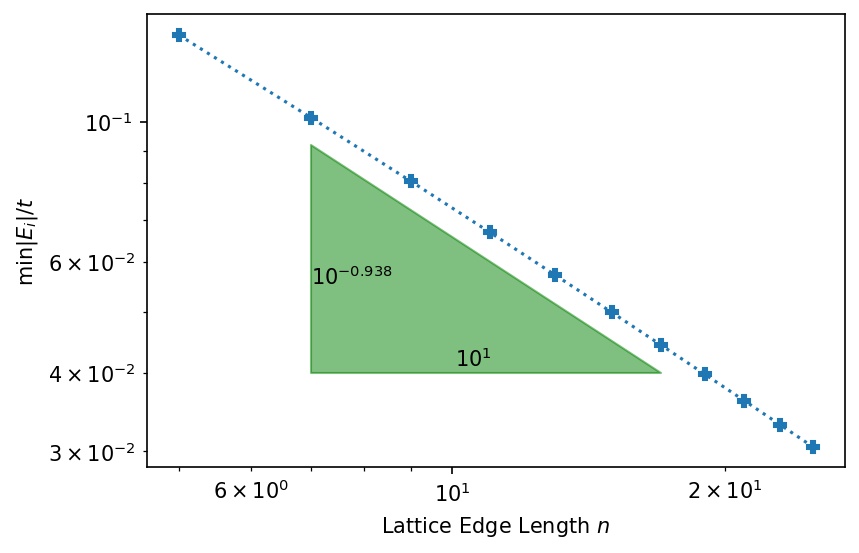

In [184]:
coeff = np.polyfit(np.log(N_range), np.log(energies_no_vortex), deg=1)


def lin_approx(x):
    return coeff[0] * x + coeff[1]


x_start = N_range[1]
x_end = x_start + 10
y_shift = 0.1
y_start = np.exp(lin_approx(np.log(x_start)) - y_shift)
y_end = np.exp(lin_approx(np.log(x_end)) - y_shift)

slope_triangle = Polygon([[x_start, y_start], [x_start, y_end], [x_end, y_end]], True)
p = PatchCollection([slope_triangle], alpha=0.5, color="green")
fig, ax = plt.subplots()
ax.loglog(N_range, energies_no_vortex, marker="P", linestyle=":")
ax.add_collection(p)
ax.text(0.42 * (x_end + x_start), y_end + 0.001, r"$10^{1}$")
coeff_string = str(round(coeff[0], 3))
ax.text(x_start, 0.42 * (y_end + y_start), r"$10^{" + coeff_string + "}$")
plt.xlabel(r"Lattice Edge Length $n$")
plt.ylabel(r"$\min{|E_{i}|}/t$")
plt.savefig("./plots/energy_scaling_no_vortex.svg")
plt.show()

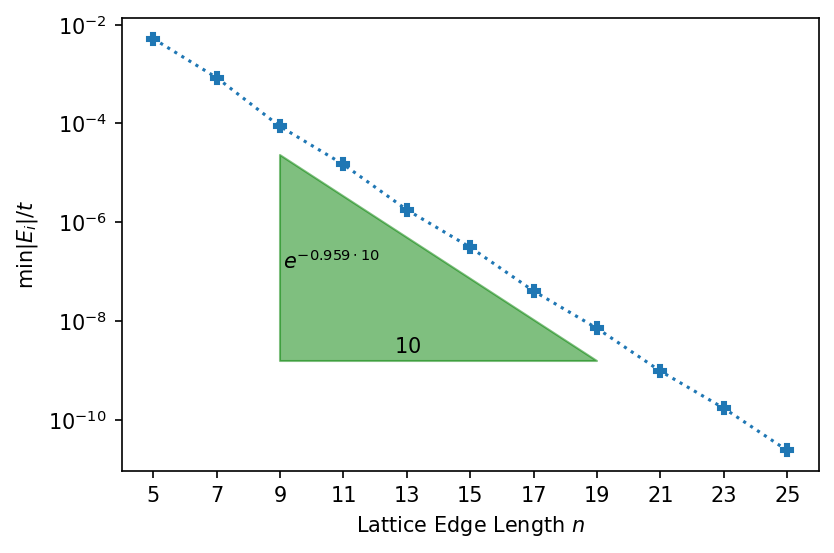

In [185]:
coeff = np.polyfit(N_range, np.log(energies_vortex), deg=1)


def lin_approx(x):
    return coeff[0] * x + coeff[1]


x_start = N_range[2]
x_end = x_start + 10
y_shift = 1.5
y_start = np.exp(lin_approx(x_start) - y_shift)
y_end = np.exp(lin_approx(x_end) - y_shift)

slope_triangle = Polygon([[x_start, y_start], [x_start, y_end], [x_end, y_end]], True)
p = PatchCollection([slope_triangle], alpha=0.5, color="green")
fig, ax = plt.subplots()
ax.semilogy(N_range, energies_vortex, marker="P", linestyle=":")
ax.add_collection(p)
ax.text(0.45 * (x_end + x_start), y_end + 0.5 * y_end, r"$10$")
coeff_string = str(round(coeff[0], 3))
ax.text(x_start + 0.1, 0.005 * (y_end + y_start), r"$e^{" + coeff_string + "\cdot 10}$")
plt.xticks(N_range)
plt.xlabel(r"Lattice Edge Length $n$")
plt.ylabel(r"$\min{|E_{i}|}/t$")
plt.savefig("./plots/energy_scaling_vortex.svg")
plt.show()